# <h1><center><font color=green> Predicting Commitment to Yoga and Wellness</center></h1>
Yoga is a popular wellness intervention that contributes to physical and mental health. Yoga can include physical stretches but also spiritual, philosophical and altruistic teachings. Many people embrace Yoga as a way of life and not just a casual form of exercise taught in gymnasiums.

There are many elements of Yoga to focus on when designing a Yoga course. Stretches, meditations, diet, psychological and spiritual teachings. Understanding the elements of yoga that predict wellness can help Yoga teachers design more refined Yoga programs.

This project explores a questionnaire designed to measure a person's commitment to Yoga as a disciplined way of living rather than just a casual form of exercise. It is anticipated that people who are more committed to Yoga as a discipline will have lower levels of stress, anxiety and depression.
If the predictors of commitment to Yoga can be identified then these can be emphasised in Yoga courses to help promote client response to Yoga and resulting satisfaction.

This analysis is based on a research project conducted in 2013 with a sample of 193 Yoga practitioners across Australia.

## <font color=green> Questions
* What questions in a Yoga Comittment Scale best capture the construct of commitment to Yoga?
* What demographic and practice variables best predict comittment to Yoga as a way of life?
* Does comittment to Yoga predict lower levels of stress, anxiety and depression?

## <font color=green> Variables
<b>Demographic & Practice Variables</b>
* Code - Client identification
* Gender: Male = 0; Female = 1
* Age: Age in years
* Status: Student = 0; Teacher = 1
* Months_practice: How many months the person has been practicing Yoga in months
* Months_teaching: How many months the person has been teaching Yoga
* Diet: Western = 0; Vegetarian = 1; Vegan = 2; Other = 3
* Alcohol (Drinks per week in last month): None = 0; Low (1 to 2 per week) = 1;  Medium (3 to 7 drinks) = 2; High (8 or more) = 3
* Classes_taught (in last month): How many classes taught in the last month
* Classes_attended (in last month): How many classes attended in the last month
    
<b>Psychological constructs</b>
* Depression (measured via the Depression Anxiety Stress21 Scale (DASS21))
* Anxiety (measured via the Depression Anxiety Stress21 Scale (DASS21))
* Stress (measured via the Depression Anxiety Stress21 Scale (DASS21))
* Spirituality (measured via the Daily Spiritual Experience Scale (DSES))
* Mindfulness (measured via Five Factor Mindfulness Questionnaire (FFMQ))
* Purpose in life (measured via the Purpose in Life Questionnire (PIL-SF))

## <font color=green> Yoga commitment scale
(not at all true of me = 1; totally true of me = 5)
1. I often read magazines or books about yoga
2. I spend time trying to develop my understanding of yoga
3. Yoga is especially important to me because it answers many questions about the meaning of life.
4. My yogic beliefs lie behind my whole approach to life.
5. My yogic beliefs influence my diet
6. I try hard to integrate yoga teachings and philosophy into my life
7. I am not interested in yoga philosophy
8. I only practice yoga for its physical benefits
9. I have perfectly integrated yoga into my daily life
10. I am committed to living a lifestyle based on yoga
11. I have a strong desire to practice yoga regularly at home or in private but it just doesn’t happen
12. Yoga is just one part of my life that is no more important than any other

## <font color=green> Section 1: Load packages & read the csv

In [1]:
#Load the desired packages
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.formula.api import ols

In [2]:
#Load the data
yoga = pd.read_csv("C:\IOD\IOD_PT_A2_Regress\yoga_yci.csv",encoding = 'utf-8')
yoga.head()

,Code,Gender,Age,Status,Months_practice,Months_teaching,Diet,Alcohol,Classes_taught,Classes_attended,...,DSES,FFMQ_OBS,FFMQ_DES,FFMQ_ACTAWARE,FFMQ_NONJUDGE,FFMQ_NONREACT,FFMQ_TOTAL,PIL_SF_Total,YCS_Comitted,YCS_Casual
0,aiey85,female,29,Yoga Student,6,0,Traditional Western,1 to 2 drinks,0.0,20,...,4.9375,12.0,15.0,15.0,14.0,9.0,65.0,18.0,10.0,12.0
1,aion75,male,39,Yoga Student,84,0,Vegan,Less than 1,0.0,12,...,4.5625,13.0,25.0,10.0,12.0,7.0,67.0,24.0,10.0,7.0
2,airs85,female,28,Yoga Student,132,0,Traditional Western,3 to 5 drinks,0.0,8,...,4.6875,14.0,18.0,19.0,17.0,19.0,87.0,22.0,14.0,4.0
3,alan85,female,29,Yoga Teacher,36,4,Vegetarian,None,15.0,16,...,3.2500,14.0,22.0,19.0,19.0,16.0,90.0,27.0,35.0,3.0
4,alaw70,female,44,Yoga Student,48,0,Other,Less than 1,0.0,8,...,3.4375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font color=green> Section 2: Data Preparation 
* Identify and remove outliers

In [177]:
# The describe function shows an anomyly in Age variable with a minimum value of -6. This needs fixing.
yoga.describe()

,Age,Months_practice,Months_teaching,Classes_taught,Classes_attended,YCI_1,YCI_2,YCI_3,YCI_4,YCI_5,...,DSES,FFMQ_OBS,FFMQ_DES,FFMQ_ACTAWARE,FFMQ_NONJUDGE,FFMQ_NONREACT,FFMQ_TOTAL,PIL_SF_Total,YCS_Comitted,YCS_Casual
count,231.000000,231.000000,231.000000,230.000000,231.000000,223.000000,223.000000,223.000000,222.000000,223.000000,...,219.000000,213.000000,214.000000,214.000000,214.000000,214.000000,213.000000,218.000000,222.000000,223.000000
mean,43.805195,133.095238,32.246753,7.152174,7.848485,3.000000,3.394619,3.219731,3.207207,2.829596,...,3.613584,15.901408,19.308411,18.420561,17.149533,16.733645,87.413146,21.876147,21.626126,4.896861
std,12.854070,127.585094,59.348892,13.129798,7.489035,1.494736,1.413056,1.470786,1.443457,1.364816,...,1.128869,2.790592,3.753962,3.423304,4.050859,3.566812,12.228108,3.833911,8.134605,2.479309
min,-6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.125000,8.000000,10.000000,7.000000,5.000000,5.000000,52.000000,9.000000,7.000000,3.000000
25%,35.000000,30.000000,0.000000,0.000000,3.500000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.718750,14.000000,16.000000,16.000000,15.000000,15.000000,80.000000,20.000000,14.000000,3.000000
50%,44.000000,99.000000,0.000000,0.000000,5.000000,3.000000,4.000000,3.000000,3.500000,3.000000,...,3.750000,16.000000,20.000000,18.000000,17.000000,17.000000,88.000000,22.500000,22.500000,4.000000
75%,53.500000,197.500000,48.000000,8.000000,10.000000,4.500000,5.000000,5.000000,4.000000,4.000000,...,4.625000,18.000000,22.000000,21.000000,20.000000,19.000000,96.000000,25.000000,29.000000,6.000000
max,74.000000,540.000000,288.000000,60.000000,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.625000,20.000000,25.000000,25.000000,25.000000,25.000000,120.000000,28.000000,35.000000,15.000000


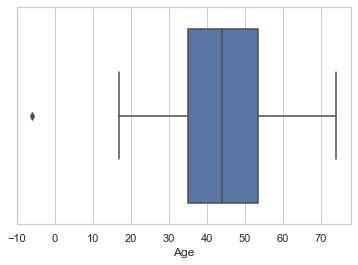

In [13]:
# Boxplot showing the Age outlier.
sns.set(style="whitegrid")
ax = sns.boxplot(x=yoga["Age"])

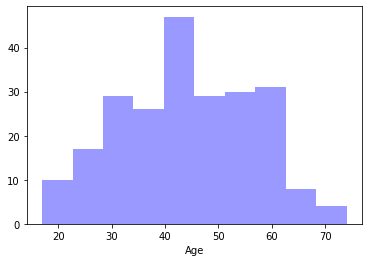

In [3]:
#Here the -6 in Age is replaced with the median value.
yoga.Age.replace(-6, yoga.Age.median(), inplace = True)
sns.distplot(yoga.Age, kde=False, color='blue')

#### Section 2 summary points
* Age variable had an outlier that was creating negative skew
* Outlier replaced with median and skew corrected.

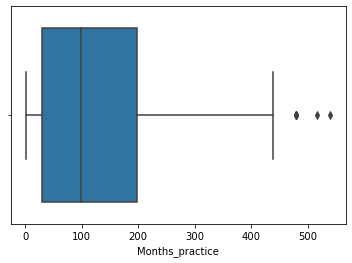

In [10]:
#Now checking outliers for Months_practice. There are outliers and they are creating a positive skew in the data.
months_box = sns.boxplot(x=yoga['Months_practice'])

In [38]:
#Months_practice outliers are values greater than 480
sorted(yoga.Months_practice)

[1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 8,
 8,
 8,
 10,
 10,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 15,
 16,
 16,
 16,
 16,
 18,
 18,
 18,
 18,
 20,
 21,
 21,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 26,
 28,
 30,
 30,
 33,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 43,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 50,
 51,
 54,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 61,
 64,
 72,
 72,
 72,
 82,
 84,
 84,
 84,
 84,
 90,
 96,
 96,
 96,
 96,
 98,
 99,
 108,
 108,
 108,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 132,
 132,
 132,
 132,
 132,
 132,
 132,
 134,
 144,
 144,
 144,
 144,
 144,
 156,
 156,
 156,
 156,
 156,
 156,
 156,
 168,
 168,
 168,
 180,
 180,
 180,
 180,
 180,
 180,
 180,
 186,
 188,
 192,
 192,
 203,
 204,
 204,
 204,
 204,
 204,
 216,
 216,
 216,
 240,
 240,
 240,
 240,
 240,
 240,
 240,
 24

In [37]:
yoga.Months_practice.unique()

array([  6,  84, 132,  36,  48,   4, 156, 252,  18,  60, 120, 288, 204,
        24, 336, 480, 168,  25,  43,  12, 420, 285,  33, 188,  90, 240,
       540,  82,  72,  10, 276,  64, 180,  96,   5, 360,  54, 372, 144,
       134, 192,  61,  16,   8,   3,  50, 257, 516,  26,  21,   2, 186,
        28, 300,  30, 216, 396, 313, 108, 432, 439,  51,  99,   1,  98,
        13, 324, 203,  15,  20,  23], dtype=int64)

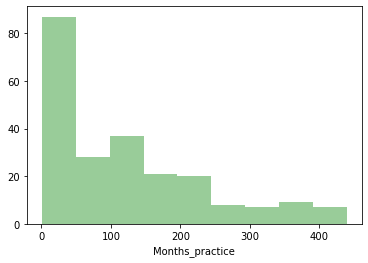

In [52]:
#Distribution of Months practice.
sns.distplot(yoga.Months_practice, kde=False, color='green')

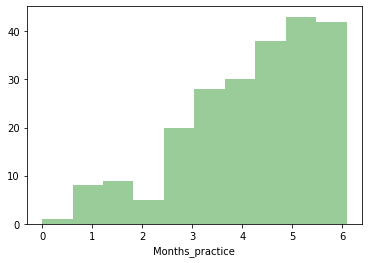

In [53]:
#Performing a log transformation does not make the data more normally distributed. 
#From: https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0
Months_log = np.log(yoga.Months_practice)
sns.distplot(Months_log, kde=False, color='green')

#### Section 2 summary points
* Some outliers in the number of months practiced which are creating positive skew.
* Cannot correct skew with logarythmic transformations

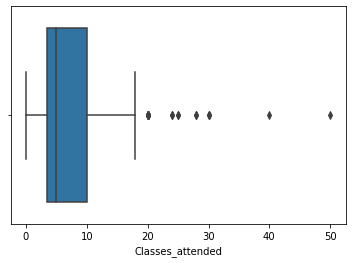

In [11]:
#Now checking outliers for Classes_attended. Again, there are outliers which are creating a positive skew in the data.
attended_box = sns.boxplot(x=yoga['Classes_attended'])

In [54]:
#There are some values above 30 which really stand out. They can be removed. The rest stay.
sorted(yoga.Classes_attended)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 17,
 18,
 18,
 18,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 24,
 24,
 25,
 25,
 28,
 28,
 30,
 30,
 30,
 40,
 50]

In [4]:
#Removing Class_attended outliers that are greater than 30
yoga = yoga[yoga['Classes_attended'] < 31] 
sorted(yoga.Classes_attended)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 17,
 18,
 18,
 18,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 24,
 24,
 25,
 25,
 28,
 28,
 30,
 30,
 30]

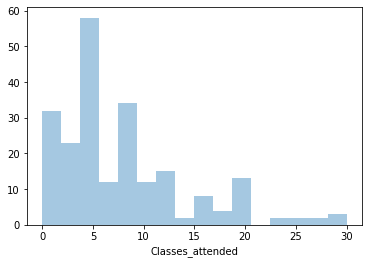

In [61]:
# The distribution is still skew even after removing these values.
sns.distplot(yoga['Classes_attended'], kde=False)

OverflowError: cannot convert float infinity to integer

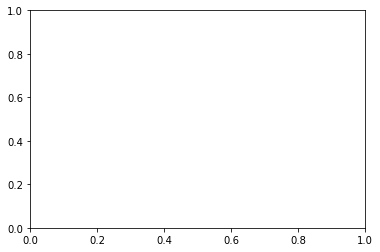

In [70]:
#Here I am trying to convert a log transformation but its not working. I don't know why.
Class_log = np.log(yoga.Classes_attended)
sns.distplot(Class_log, kde=False, color='blue')

### Section 2 summary:
- There are 3 continous variables that have been checked for outliers and normal distribution
    - Age
    - Months_practice
    - Classes_attended
- Outliers have been removed
- The data for Age is normally distributed
- The data for Months_practice and Class_attended is positively skewed and can't easily be transformed
- For now I'm moving on to address missing values and will used the data in its skewed form but non-parametric tests could be explored in the future

## <font color=green> Section 2b: Exploratory Data Analysis

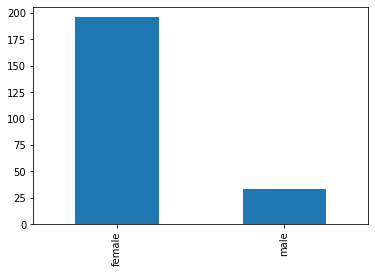

In [5]:
yoga['Gender'].value_counts().plot(kind='bar')

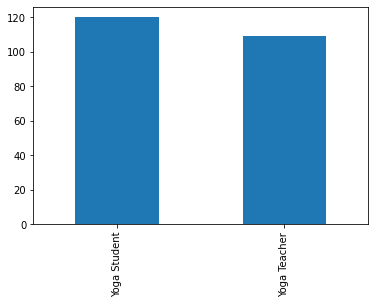

In [7]:
yoga['Status'].value_counts().plot(kind='bar')

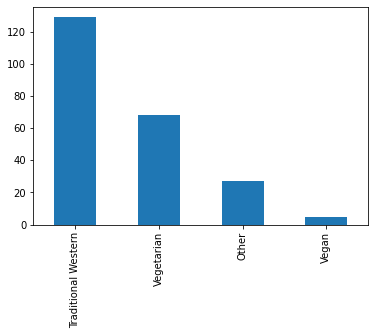

In [8]:
yoga['Diet'].value_counts().plot(kind='bar')

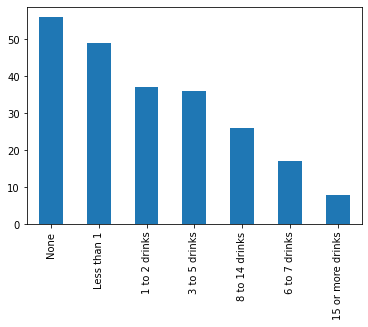

In [9]:
yoga['Alcohol'].value_counts().plot(kind='bar')

## <font color=green> Section 3) Replace missing values
- Identify missing values
- Replace missing values with median or mean as required

In [101]:
#Explore missing values
yoga.isnull().sum()

Code                 0
Gender               0
Age                  0
Status               0
Months_practice      0
Months_teaching      0
Diet                 0
Alcohol              0
Classes_taught       1
Classes_attended     0
Home_practice        0
YCI_1                8
YCI_2                8
YCI_3                8
YCI_4                8
YCI_5                8
YCI_6                8
YCI_7                8
YCI_8                8
YCI_9                8
YCI_10               8
YCI_11               8
YCI_12               8
DASS_Stress          1
DASS_Anxiety         1
DASS_Depress         1
DSES                11
FFMQ_OBS            18
FFMQ_DES            17
FFMQ_ACTAWARE       17
FFMQ_NONJUDGE       17
FFMQ_NONREACT       17
FFMQ_TOTAL          18
PIL_SF_Total        13
YCS_Comitted         8
YCS_Casual           8
dtype: int64

In [10]:
#fill missing values with median values for variables relevant for the research question - "what predicts YCO_Committed?"
#Note. If just want to drop rows with missing values use this code: df.dropna(inplace=True)
yoga.Classes_taught.fillna(yoga.Classes_taught.median(), inplace=True)
yoga.YCI_1.fillna(yoga.YCI_1.median(), inplace=True)
yoga.YCI_2.fillna(yoga.YCI_2.median(), inplace=True)
yoga.YCI_3.fillna(yoga.YCI_3.median(), inplace=True)
yoga.YCI_4.fillna(yoga.YCI_4.median(), inplace=True)
yoga.YCI_5.fillna(yoga.YCI_5.median(), inplace=True)
yoga.YCI_6.fillna(yoga.YCI_6.median(), inplace=True)
yoga.YCI_7.fillna(yoga.YCI_7.median(), inplace=True)
yoga.YCI_8.fillna(yoga.YCI_8.median(), inplace=True)
yoga.YCI_9.fillna(yoga.YCI_9.median(), inplace=True)
yoga.YCI_10.fillna(yoga.YCI_10.median(), inplace=True)
yoga.YCI_11.fillna(yoga.YCI_11.median(), inplace=True)
yoga.YCI_12.fillna(yoga.YCI_12.median(), inplace=True)

In [11]:
#Fill other variables with median values

yoga.DASS_Stress.fillna(yoga.DASS_Stress.median(), inplace=True)
yoga.DASS_Anxiety.fillna(yoga.DASS_Anxiety.median(), inplace=True)
yoga.DASS_Depress.fillna(yoga.DASS_Depress.median(), inplace=True)
yoga.DSES.fillna(yoga.DSES.median(), inplace=True)
yoga.FFMQ_OBS.fillna(yoga.FFMQ_OBS.median(), inplace=True)
yoga.FFMQ_DES.fillna(yoga.FFMQ_DES.median(), inplace=True)
yoga.FFMQ_ACTAWARE.fillna(yoga.FFMQ_ACTAWARE.median(), inplace=True)
yoga.FFMQ_NONJUDGE.fillna(yoga.FFMQ_NONJUDGE.median(), inplace=True)
yoga.FFMQ_NONREACT.fillna(yoga.FFMQ_NONREACT.median(), inplace=True)
yoga.FFMQ_TOTAL.fillna(yoga.FFMQ_TOTAL.median(), inplace=True)
yoga.PIL_SF_Total.fillna(yoga.PIL_SF_Total.median(), inplace=True)
#yoga.YCS_Comitted.fillna(yoga.YCS_Comitted.median(), inplace=True)
#yoga.YCS_Casual.fillna(yoga.YCS_Casual.median(), inplace=True)

In [12]:
#Check missing values now after median imputation
yoga.isnull().sum()

Code                0
Gender              0
Age                 0
Status              0
Months_practice     0
Months_teaching     0
Diet                0
Alcohol             0
Classes_taught      0
Classes_attended    0
Home_practice       0
YCI_1               0
YCI_2               0
YCI_3               0
YCI_4               0
YCI_5               0
YCI_6               0
YCI_7               0
YCI_8               0
YCI_9               0
YCI_10              0
YCI_11              0
YCI_12              0
DASS_Stress         0
DASS_Anxiety        0
DASS_Depress        0
DSES                0
FFMQ_OBS            0
FFMQ_DES            0
FFMQ_ACTAWARE       0
FFMQ_NONJUDGE       0
FFMQ_NONREACT       0
FFMQ_TOTAL          0
PIL_SF_Total        0
YCS_Comitted        8
YCS_Casual          8
dtype: int64

In [10]:
yoga.to_csv(r'C:\IOD\IOD_PT_A2_Regress\yoga_clean.csv', index = False)

### Section 3 summary points 
* Missing values have been replaced with the median values
* Some of the variables still need to be explored for outliers and normality but for now this is enough so I can keep moving forward
    * --> Outstanding tasks to do:
        * 1) Explore variables for outliers and normality and then re-insert median values once this has been done.
            * DASS_Stress, DASS_Anxiety, DASS_Depress, DSES, FFMQ_TOTAL, PIL_SF_Total,YCS_Comitted,YCS_Casual

In [13]:
#select only the columns needed for research question - "what predicts YCI_Comitted?"
yoga.drop(['Code','Months_teaching','Classes_taught', 'FFMQ_OBS', 'FFMQ_DES', 'FFMQ_ACTAWARE', 'FFMQ_NONJUDGE',
       'FFMQ_NONREACT', 'YCS_Comitted','YCS_Casual'],axis=1,inplace=True)
yoga.columns

Index(['Gender', 'Age', 'Status', 'Months_practice', 'Diet', 'Alcohol',
       'Classes_attended', 'Home_practice', 'YCI_1', 'YCI_2', 'YCI_3', 'YCI_4',
       'YCI_5', 'YCI_6', 'YCI_7', 'YCI_8', 'YCI_9', 'YCI_10', 'YCI_11',
       'YCI_12', 'DASS_Stress', 'DASS_Anxiety', 'DASS_Depress', 'DSES',
       'FFMQ_TOTAL', 'PIL_SF_Total'],
      dtype='object')

In [167]:
#Check the data types to make sure they are all appropriate
yoga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 230
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            229 non-null    object 
 1   Age               229 non-null    int64  
 2   Status            229 non-null    object 
 3   Months_practice   229 non-null    int64  
 4   Diet              229 non-null    object 
 5   Alcohol           229 non-null    object 
 6   Classes_attended  229 non-null    int64  
 7   Home_practice     229 non-null    object 
 8   YCI_1             229 non-null    float64
 9   YCI_2             229 non-null    float64
 10  YCI_3             229 non-null    float64
 11  YCI_4             229 non-null    float64
 12  YCI_5             229 non-null    float64
 13  YCI_6             229 non-null    float64
 14  YCI_7             229 non-null    float64
 15  YCI_8             229 non-null    float64
 16  YCI_9             229 non-null    float64
 1

### Section 3 summary point
* I now have a dataframe with outliers removed, no missing values and only relevant columns

## <font color=green>Section 4: Create a "Yoga committed" variable based on the results of EFA

An exploratory factor analysis was conducted to determine the best items of the Yoga Commitment Scale that represent 1) a commitment to Yoga as a disiciplined lifestyle; 2) a casual attitude towards Yoga.
    
Factor analysis is used to estimate a model which explains the variance and covariance between observed values that can be attributed to a set of fewer unobserved factors.

In [183]:
#import the datasets
df= pd.read_csv("../Python_EFA/yogaEFA.csv")
df.head()


,YCI_1,YCI_2,YCI_3,YCI_4,YCI_5,YCI_6,YCI_7,YCI_8,YCI_9,YCI_10,YCI_11,YCI_12
0,1,1,1,1,1,1,5,4,3,2,5,3
1,1,1,1,1,1,1,5,4,3,2,5,3
2,1,1,1,1,1,1,5,4,3,2,5,3
3,2,1,1,1,2,2,2,2,1,2,3,3
4,2,1,1,1,2,2,2,2,1,2,3,3


In [184]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3,rotation="varimax")

In [185]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [186]:
#Get the loadings
loadings = fa.loadings_
loadings

array([[ 0.34137394,  0.84806956, -0.21596867],
       [ 0.45489571,  0.72012075, -0.30647466],
       [ 0.64271687,  0.52008887, -0.3022664 ],
       [ 0.7092613 ,  0.48036229, -0.35975129],
       [ 0.64144493,  0.39245862, -0.27782233],
       [ 0.57927262,  0.43102118, -0.36832181],
       [-0.15896237, -0.23698355,  0.63274483],
       [-0.0450623 , -0.18868952,  0.93450406],
       [ 0.64332789,  0.11999654, -0.01333765],
       [ 0.7631214 ,  0.37164931, -0.23762199],
       [-0.18188442, -0.10036208,  0.14751246],
       [-0.23912027, -0.07089225,  0.4557329 ]])

In [187]:
#Get the eigenvalues and eigenvalues
ev, v = fa.get_eigenvalues()

In [188]:
xvals = range(1,df.shape[1]+1)

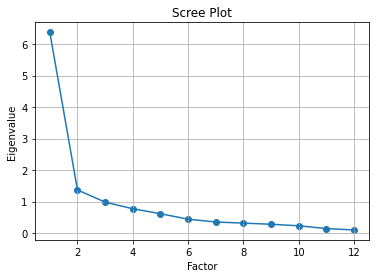

In [189]:
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [74]:
#Showing the loadings
pd.DataFrame.from_records(loadings)

,0,1,2
0,0.341374,0.848070,-0.215969
1,0.454896,0.720121,-0.306475
2,0.642717,0.520089,-0.302266
3,0.709261,0.480362,-0.359751
4,0.641445,0.392459,-0.277822
5,0.579273,0.431021,-0.368322
6,-0.158962,-0.236984,0.632745
7,-0.045062,-0.188690,0.934504
8,0.643328,0.119997,-0.013338
9,0.763121,0.371649,-0.237622


### Loading results
#1. I often read magazines or books about yoga
- loads well onto factor 2 (0.84) - Keep

#2. I spend time trying to develop my understanding of yoga
- loads well onto factor 2 (0.72) with cross loadings onto factor 1 (0.45) - Keep

#3. Yoga is especially important to me because it answers many questions about the meaning of life.
- loads well onto factor 1 (0.64) with strong cross loadings onto factor 2 (0.52) - discard

#4. My yogic beliefs lie behind my whole approach to life.
- loads well onto factor 1 (0.71) with cross loadings onto factor 2 (0.48) - keep

#5. My yogic beliefs influence my diet
- loads well onto factor 1 (0.64) with cross loadings onto factor 2 (0.39) - keep

#6. I try hard to integrate yoga teachings and philosophy into my life
- loads onto factor 1 (0.57) with strong cross loadings onto factor 2 (0.43) - discard

#7. I am not interested in yoga philosophy
- loads well onto factor 3 (0.63) - keep

#8. I only practice yoga for its physical benefits
- loads well onto factor 3 (0.93) - keep

#9. I have perfectly integrated yoga into my daily life
- loads onto factor 1 (0.64) 

#10. I am committed to living a lifestyle based on yoga 
- loads onto factor 1 (0.76) with cross loadings onto factor 2 (0.37) - keep

#11. I have a strong desire to practice yoga regularly at home or in private but it just doesn’t happen
- no loadings - discard

#12. Yoga is just one part of my life that is no more important than any other
- loads onto factor 3 - (0.45) - keep

## Decision the following items will be kept and provide a good couple of factors.

<B>Factor 1 - Committed</B>
 - 3. Yoga is especially important to me because it answers many questions about the meaning of life.
 - 4. My yogic beliefs lie behind my whole approach to life.
 - 5. My yogic beliefs influence my diet
 - 6. I try hard to integrate yoga teachings and philosophy into my life
 - 9. I have perfectly integrated yoga into my daily life
 - 10. I am committed to living a lifestyle based on yoga

<B>Factor 3 - Casual</B>
 - 7. I am not interested in yoga philosophy
 - 8. I only practice yoga for its physical benefits
 - 12. Yoga is just one part of my life that is no more important than any other

### Run the EFA with this new structure. 

In [190]:
#drop irrelevant columns
df.drop(['YCI_1','YCI_2','YCI_11'],axis=1,inplace=True)
df.columns

Index(['YCI_3', 'YCI_4', 'YCI_5', 'YCI_6', 'YCI_7', 'YCI_8', 'YCI_9', 'YCI_10',
       'YCI_12'],
      dtype='object')

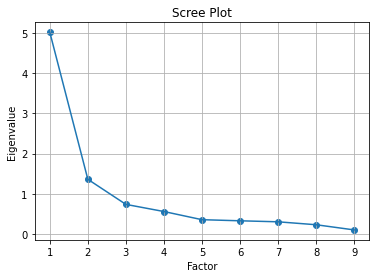

In [191]:
fa = FactorAnalyzer(n_factors=2,rotation="varimax")
fa.fit(df)
loadings = fa.loadings_
ev, v = fa.get_eigenvalues()
xvals = range(1,df.shape[1]+1)
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [77]:
pd.DataFrame.from_records(loadings)

,0,1
0,0.803029,-0.345916
1,0.856846,-0.391890
2,0.749854,-0.297265
3,0.705636,-0.397493
4,-0.237999,0.652048
5,-0.101515,0.956872
6,0.609252,0.000446
7,0.835634,-0.248097
8,-0.234148,0.433058


In [14]:
#Create a Committed variable by summing items 3,4,5,6,9,10
yoga['YCI_Committed'] = yoga['YCI_3'] + yoga['YCI_4']+ yoga['YCI_5']+ yoga['YCI_6']+ yoga['YCI_9']+ yoga['YCI_10']
yoga['YCI_Casual'] = yoga['YCI_7'] + yoga['YCI_8']+ yoga['YCI_12']

In [15]:
#Good. The dataframe now has a column repesenting the Committed variable.
yoga.head()

,Gender,Age,Status,Months_practice,Diet,Alcohol,Classes_attended,Home_practice,YCI_1,YCI_2,...,YCI_11,YCI_12,DASS_Stress,DASS_Anxiety,DASS_Depress,DSES,FFMQ_TOTAL,PIL_SF_Total,YCI_Committed,YCI_Casual
0,female,29,Yoga Student,6,Traditional Western,1 to 2 drinks,20,Never,1.0,1.0,...,5.0,3.0,12.0,6.0,4.0,4.9375,65.0,18.0,9.0,12.0
1,male,39,Yoga Student,84,Vegan,Less than 1,12,1 to 2 times,2.0,1.0,...,3.0,3.0,36.0,16.0,14.0,4.5625,67.0,24.0,9.0,7.0
2,female,28,Yoga Student,132,Traditional Western,3 to 5 drinks,8,Less than weekly,1.0,3.0,...,3.0,2.0,16.0,10.0,0.0,4.6875,87.0,22.0,11.0,4.0
3,female,29,Yoga Teacher,36,Vegetarian,None,16,Daily,3.0,5.0,...,1.0,1.0,22.0,6.0,2.0,3.2500,90.0,27.0,30.0,3.0
4,female,44,Yoga Student,48,Other,Less than 1,8,1 to 2 times,3.0,4.0,...,2.0,2.0,10.0,6.0,2.0,3.4375,88.0,22.5,18.0,4.0


In [194]:
#Here I am confirming that there are no missing values. 
yoga.isna().sum()

Gender              0
Age                 0
Status              0
Months_practice     0
Diet                0
Alcohol             0
Classes_attended    0
Home_practice       0
YCI_1               0
YCI_2               0
YCI_3               0
YCI_4               0
YCI_5               0
YCI_6               0
YCI_7               0
YCI_8               0
YCI_9               0
YCI_10              0
YCI_11              0
YCI_12              0
DASS_Stress         0
DASS_Anxiety        0
DASS_Depress        0
DSES                0
FFMQ_TOTAL          0
PIL_SF_Total        0
YCI_Committed       0
YCI_Casual          0
dtype: int64

### Section 4 summary point
* I now have "Yoga committed" dependent variable that can be used in regressions

## <font color=green> Section 5: Standardising the data
- Now that outliers are removed, missing values are removed and the Yoga Commitment Score has been calculated it is time to standardise the data before correlations and regressions are run

In [16]:
# This z-score formula is from https://www.geeksforgeeks.org/scipy-stats-zscore-function-python/#:~:text=zscore(arr%2C%20axis%3D0,score%20is%20to%20be%20calculated.
yoga['Age'] = stats.zscore(yoga.Age, axis = 0)
yoga['Months_practice'] = stats.zscore(yoga.Months_practice, axis = 0)
yoga['Classes_attended'] = stats.zscore(yoga.Classes_attended, axis = 0)
yoga['DASS_Stress'] = stats.zscore(yoga.DASS_Stress, axis = 0)
yoga['DASS_Anxiety'] = stats.zscore(yoga.DASS_Anxiety, axis = 0)
yoga['DASS_Depress'] = stats.zscore(yoga.DASS_Depress, axis = 0)
yoga['Spirituality'] = stats.zscore(yoga.DSES, axis = 0)
yoga['Mindfulness'] = stats.zscore(yoga.FFMQ_TOTAL, axis = 0)
yoga['Purpose'] = stats.zscore(yoga.PIL_SF_Total, axis = 0)
yoga['YCI_Committed'] = stats.zscore(yoga.YCI_Committed, axis = 0)
yoga['YCI_Casual'] = stats.zscore(yoga.YCI_Casual, axis = 0)
yoga.drop(['DSES','FFMQ_TOTAL','PIL_SF_Total'],axis=1,inplace=True)
yoga.head()

,Gender,Age,Status,Months_practice,Diet,Alcohol,Classes_attended,Home_practice,YCI_1,YCI_2,...,YCI_11,YCI_12,DASS_Stress,DASS_Anxiety,DASS_Depress,YCI_Committed,YCI_Casual,Spirituality,Mindfulness,Purpose
0,female,-1.226660,Yoga Student,-0.996846,Traditional Western,1 to 2 drinks,1.881842,Never,1.0,1.0,...,5.0,3.0,0.481250,0.573071,0.000000,-1.344450,2.919658,1.193855,-1.913664,-1.047417
1,male,-0.417368,Yoga Student,-0.386373,Vegan,Less than 1,0.675144,1 to 2 times,2.0,1.0,...,3.0,3.0,3.979864,2.642997,1.778478,-1.344450,0.872500,0.852896,-1.742647,0.568698
2,female,-1.307589,Yoga Student,-0.010697,Traditional Western,3 to 5 drinks,0.071796,Less than weekly,1.0,3.0,...,3.0,2.0,1.064353,1.401041,-0.711391,-1.052345,-0.355794,0.966549,-0.032486,0.029993
3,female,-1.226660,Yoga Teacher,-0.762049,Vegetarian,None,1.278493,Daily,3.0,5.0,...,1.0,1.0,1.939006,0.573071,-0.355696,1.722656,-0.765226,-0.340463,0.224039,1.376756
4,female,-0.012722,Yoga Student,-0.668130,Other,Less than 1,0.071796,1 to 2 times,3.0,4.0,...,2.0,2.0,0.189699,0.573071,-0.355696,-0.029976,-0.355794,-0.169984,0.053022,0.164670


In [196]:
yoga.columns

Index(['Gender', 'Age', 'Status', 'Months_practice', 'Diet', 'Alcohol',
       'Classes_attended', 'Home_practice', 'YCI_1', 'YCI_2', 'YCI_3', 'YCI_4',
       'YCI_5', 'YCI_6', 'YCI_7', 'YCI_8', 'YCI_9', 'YCI_10', 'YCI_11',
       'YCI_12', 'DASS_Stress', 'DASS_Anxiety', 'DASS_Depress',
       'YCI_Committed', 'YCI_Casual', 'Spirituality', 'Mindfulness',
       'Purpose'],
      dtype='object')

StandardScaler was used but resulted in a dataset with only continous variables. I only know how to conduct regression with categorical and continuous variables when all variables are in the same dataset. So did not use it.

In [134]:
#This code will rescale the data using StandardScaler
#Problem: How to scale only the continous variables and leave the categorical variables in the dataset.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_yoga = scaler.fit_transform(yoga[['Age','Months_practice', 'Classes_attended','YCI_1','YCI_2','YCI_3','YCI_4','YCI_5','YCI_6','YCI_7','YCI_8','YCI_9','YCI_10','YCI_11','YCI_12','DASS_Stress',
       'DASS_Anxiety', 'DASS_Depress', 'DSES', 'FFMQ_TOTAL','PIL_SF_Total','YCI_Committed']])
yoga = pd.DataFrame(scaled_yoga)
yoga.rename(columns={0: "Age", 1: "Months_practice", 2:"Classes_attended", 3:"YCI_1", 4:"YCI_2", 5:"YCI_3",6:"YCI_4",7:"YCI_5",8:"YCI_6",9:"YCI_7", 10:"YCI_8",11:"YCI_9",12:"YCI_10",13:"YCI_11",14:"YCI_12",15:"DASS_Stress",16:"DASS_Anxiety",17:"DASS_Depress",18:"Spirituality",19:"Mindfulness",20:"Purpose",21:"YCI_Committed"})


,Age,Months_practice,Classes_attended,YCI_1,YCI_2,YCI_3,YCI_4,YCI_5,YCI_6,YCI_7,...,YCI_10,YCI_11,YCI_12,DASS_Stress,DASS_Anxiety,DASS_Depress,Spirituality,Mindfulness,Purpose,YCI_Committed
0,-1.226660,-0.996846,1.881842,-1.358539,-1.729492,-1.524213,-1.549520,-1.363512,-1.665945,3.602607,...,-0.718412,2.180103,0.957508,0.481250,0.573071,0.000000,1.193855,-1.913664,-1.047417,-1.344450
1,-0.417368,-0.386373,0.675144,-0.676290,-1.729492,-1.524213,-1.549520,-0.618299,-0.916433,0.535704,...,-0.718412,0.610155,0.957508,3.979864,2.642997,1.778478,0.852896,-1.742647,0.568698,-1.344450
2,-1.307589,-0.010697,0.071796,-1.358539,-0.291911,-0.833035,-1.549520,-0.618299,-0.166922,-0.486597,...,-1.443154,0.610155,0.069778,1.064353,1.401041,-0.711391,0.966549,-0.032486,0.029993,-1.052345
3,-1.226660,-0.762049,1.278493,0.005959,1.145671,1.240498,1.272270,1.617340,1.332101,-0.486597,...,1.455813,-0.959794,-0.817952,1.939006,0.573071,-0.355696,-0.340463,0.224039,1.376756,1.722656
4,-0.012722,-0.668130,0.071796,0.005959,0.426880,-0.141857,-0.138625,0.126914,-0.166922,-0.486597,...,0.006330,-0.174820,0.069778,0.189699,0.573071,-0.355696,-0.169984,0.053022,0.164670,-0.029976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,-1.712235,-1.028153,0.071796,0.005959,0.426880,-0.141857,-0.138625,0.126914,-0.166922,-0.486597,...,0.006330,-0.174820,0.069778,1.355904,4.298937,1.067087,0.114150,0.053022,0.164670,-0.029976
225,1.039357,2.712951,0.071796,1.370456,1.145671,1.240498,1.272270,1.617340,1.332101,-0.486597,...,1.455813,-0.959794,-0.817952,-0.684954,-0.668884,-0.711391,-2.215742,0.908103,0.838051,1.576604
226,1.444003,-0.863794,-0.229878,-1.358539,-1.729492,-1.524213,-1.549520,-1.363512,-1.665945,2.580306,...,-1.443154,1.395129,1.845238,0.189699,-0.668884,0.355696,1.534815,0.224039,-0.239359,-1.782608
227,0.310994,-0.104616,-0.531553,-1.358539,-1.729492,0.549320,0.566822,-0.618299,-0.916433,1.558005,...,-0.718412,1.395129,0.957508,-0.393403,0.573071,-0.711391,0.909722,-0.203502,0.029993,0.116077


## <font color=green> Section 6: Conduct a multiple linear regression with the following features: 
#### <font color=green> Outcome variable:
* YCI_Committed (continous)

#### <font color=green> Predictor variables are:
* Gender (categorical)
* Age (continous)
* Status (categorical)
* Months_practice (continous)
* Diet (categorical)
* Alcohol (categorical)
* Classes_attended (continous)
* Home_practice (categorical)<font/>


###  <font color=green> a) Run a quick regression analysis with the statsmodels package </font>
* This will give anestimate of what to expect from a more thorough analysis.

In [197]:
model = ols('YCI_Committed ~ C(Gender) + Age + C(Status) + Months_practice + C(Diet) + C(Alcohol) + Classes_attended + C(Home_practice)', data=yoga)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          YCI_Committed   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     11.40
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           3.29e-23
Time:                        23:39:14   Log-Likelihood:                -243.52
No. Observations:                 229   AIC:                             527.0
Df Residuals:                     209   BIC:                             595.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.4896      0.229     -2.139      0.034      -0.941      -0.038
C(Gender)[T.male]                       -0.1998      0.152     -1.315      0.190      -0.499       0.100
C(Status)[T.Yoga Teacher]                0.5865      0.132      4.440      0.000       0.326       0.847
C(Diet)[T.Traditional Western]           0.0686      0.164      0.419      0.676      -0.254       0.392
C(Diet)[T.Vegan]                         0.2021      0.373      0.542      0.589      -0.534       0.938
C(Diet)[T.Vegetarian]                    0.5476      0.172      3.179      0.002       0.208       0.887
C(Alcohol)[T.15 or more drinks]          0.2860      0.294      0.973      0.331      -0.293       0.865
C(Alcohol)[T.3 to 5 drinks]              0.2182      0.180      1.214      0.226      -0.136       0.572
C(Alcohol)[T.6 to 7 drinks]              0.1805      0.223      0.809      0.420      -0.259       0.620
C(Alcohol)[T.8 to 14 drinks]             0.0421      0.202      0.208      0.835      -0.356       0.440
C(Alcohol)[T.Less than 1]                0.1811      0.166      1.091      0.277      -0.146       0.508
C(Alcohol)[T.None]                       0.1685      0.167      1.009      0.314      -0.161       0.498
C(Home_practice)[T.3 to 5 times]        -0.0538      0.152     -0.355      0.723      -0.353       0.245
C(Home_practice)[T.Daily]                0.1337      0.169      0.789      0.431      -0.200       0.468
C(Home_practice)[T.Less than weekly]    -0.3182      0.173     -1.839      0.067      -0.659       0.023
C(Home_practice)[T.More than daily]      0.5419      0.361      1.501      0.135      -0.170       1.254
C(Home_practice)[T.Never]               -0.6301      0.178     -3.542      0.000      -0.981      -0.279
Age                                     -0.1632      0.063     -2.608      0.010      -0.287      -0.040
Months_practice                          0.2967      0.067      4.450      0.000       0.165       0.428
Classes_attended                         0.1560      0.054      2.894      0.004       0.050       0.262
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.135
Skew:                          -0.016   Prob(JB):                        0.935
Kurtosis:                       2.886   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Section 6 summary point
#### Results suggest the following about predicting YCI_Committed levels:
<b>Postive predictors</b>
* Being a yoga teacher 
* Months practicing Yoga
* Having a vegetarian diet
* Classes attended in the last month <font/> 

<b>Negative predictors</b>
* Age is a negative predictor
* Never practicing at home




### <font color=green> b) Conduct a regression using different method and categorical and continous variables </font>

* First identify potential associations with correlations
* Secondly use variables identifed in correlations as predictors in regressions

In [203]:
#First dummy code the categorical variables so I can run correlations and then regressions
yoga_with_dummies = pd.get_dummies(data = yoga, columns = ['Gender', 'Status','Diet','Alcohol','Home_practice'], 
                                      prefix = ['Gender', 'Status','Diet','Alcohol','Home_practice'])
yoga_with_dummies.head()

,Age,Months_practice,Classes_attended,YCI_1,YCI_2,YCI_3,YCI_4,YCI_5,YCI_6,YCI_7,...,Alcohol_6 to 7 drinks,Alcohol_8 to 14 drinks,Alcohol_Less than 1,Alcohol_None,Home_practice_1 to 2 times,Home_practice_3 to 5 times,Home_practice_Daily,Home_practice_Less than weekly,Home_practice_More than daily,Home_practice_Never
0,-1.226660,-0.996846,1.881842,1.0,1.0,1.0,1.0,1.0,1.0,5.0,...,0,0,0,0,0,0,0,0,0,1
1,-0.417368,-0.386373,0.675144,2.0,1.0,1.0,1.0,2.0,2.0,2.0,...,0,0,1,0,1,0,0,0,0,0
2,-1.307589,-0.010697,0.071796,1.0,3.0,2.0,1.0,2.0,3.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,-1.226660,-0.762049,1.278493,3.0,5.0,5.0,5.0,5.0,5.0,1.0,...,0,0,0,1,0,0,1,0,0,0
4,-0.012722,-0.668130,0.071796,3.0,4.0,3.0,3.0,3.0,3.0,1.0,...,0,0,1,0,1,0,0,0,0,0


In [199]:
#Now get a list of all the variables so I can run correlations between YCI_Committment with the variables identified in the 
#previous regression.
yoga_with_dummies.columns

Index(['Age', 'Months_practice', 'Classes_attended', 'YCI_1', 'YCI_2', 'YCI_3',
       'YCI_4', 'YCI_5', 'YCI_6', 'YCI_7', 'YCI_8', 'YCI_9', 'YCI_10',
       'YCI_11', 'YCI_12', 'DASS_Stress', 'DASS_Anxiety', 'DASS_Depress',
       'YCI_Committed', 'YCI_Casual', 'Spirituality', 'Mindfulness', 'Purpose',
       'Gender_female', 'Gender_male', 'Status_Yoga Student',
       'Status_Yoga Teacher', 'Diet_Other', 'Diet_Traditional Western',
       'Diet_Vegan', 'Diet_Vegetarian', 'Alcohol_1 to 2 drinks',
       'Alcohol_15 or more drinks', 'Alcohol_3 to 5 drinks',
       'Alcohol_6 to 7 drinks', 'Alcohol_8 to 14 drinks',
       'Alcohol_Less than 1', 'Alcohol_None', 'Home_practice_1 to 2 times',
       'Home_practice_3 to 5 times', 'Home_practice_Daily',
       'Home_practice_Less than weekly', 'Home_practice_More than daily',
       'Home_practice_Never'],
      dtype='object')

In [205]:
yoga_with_dummies.rename(columns={'Status_Yoga Student':'Status_Yoga_Student','Status_Yoga Teacher':'Status_Yoga_Teacher', 'Diet_Traditional Western':'Diet_Traditional_Western','Alcohol_1 to 2 drinks':'Alcohol_1_to_2_drinks',
                                  'Alcohol_15 or more drinks':'Alcohol_15_or_more_drinks','Alcohol_3 to 5 drinks':'Alcohol_3_to_5_drinks',
                                   'Alcohol_6 to 7 drinks':'Alcohol_6_to_7_drinks','Alcohol_8 to 14 drinks':'Alcohol_8_to_14_drinks',
                                   'Alcohol_Less than 1':'Alcohol_Less_than_1', 'Home_practice_1 to 2 times':'Home_practice_1_to_2_times',
                                    'Home_practice_3 to 5 times':'Home_practice_3_to_5_times', 'Home_practice_Less than weekly':'Home_practice_Less_than_weekly',
                                     'Home_practice_More than daily':'Home_practice_More_than_daily'},inplace = True)

In [206]:
yoga_with_dummies.columns

Index(['Age', 'Months_practice', 'Classes_attended', 'YCI_1', 'YCI_2', 'YCI_3',
       'YCI_4', 'YCI_5', 'YCI_6', 'YCI_7', 'YCI_8', 'YCI_9', 'YCI_10',
       'YCI_11', 'YCI_12', 'DASS_Stress', 'DASS_Anxiety', 'DASS_Depress',
       'YCI_Committed', 'YCI_Casual', 'Spirituality', 'Mindfulness', 'Purpose',
       'Gender_female', 'Gender_male', 'Status_Yoga_Student',
       'Status_Yoga_Teacher', 'Diet_Other', 'Diet_Traditional_Western',
       'Diet_Vegan', 'Diet_Vegetarian', 'Alcohol_1_to_2_drinks',
       'Alcohol_15_or_more_drinks', 'Alcohol_3_to_5_drinks',
       'Alcohol_6_to_7_drinks', 'Alcohol_8_to_14_drinks',
       'Alcohol_Less_than_1', 'Alcohol_None', 'Home_practice_1_to_2_times',
       'Home_practice_3_to_5_times', 'Home_practice_Daily',
       'Home_practice_Less_than_weekly', 'Home_practice_More_than_daily',
       'Home_practice_Never'],
      dtype='object')

In [207]:
yoga_corr = yoga_with_dummies[['YCI_Committed','Age','Status_Yoga_Teacher','Months_practice','Classes_attended','Home_practice_Never','Home_practice_Less_than_weekly', 'Diet_Vegetarian']]
yoga_corr.corr(method='pearson')

,YCI_Committed,Age,Status_Yoga_Teacher,Months_practice,Classes_attended,Home_practice_Never,Home_practice_Less_than_weekly,Diet_Vegetarian
YCI_Committed,1.000000,-0.029441,0.549932,0.406820,-0.034501,-0.342435,-0.189917,0.393694
Age,-0.029441,1.000000,0.036701,0.485739,-0.208313,-0.046836,-0.251133,-0.057770
Status_Yoga_Teacher,0.549932,0.036701,1.000000,0.445571,-0.196668,-0.292303,-0.291511,0.184346
Months_practice,0.406820,0.485739,0.445571,1.000000,-0.296656,-0.145358,-0.231940,0.154093
Classes_attended,-0.034501,-0.208313,-0.196668,-0.296656,1.000000,0.121581,0.154059,-0.032628
Home_practice_Never,-0.342435,-0.046836,-0.292303,-0.145358,0.121581,1.000000,-0.167690,-0.139031
Home_practice_Less_than_weekly,-0.189917,-0.251133,-0.291511,-0.231940,0.154059,-0.167690,1.000000,-0.096886
Diet_Vegetarian,0.393694,-0.057770,0.184346,0.154093,-0.032628,-0.139031,-0.096886,1.000000


In [209]:
yoga_corr = yoga_with_dummies[['YCI_Committed','Age', 'Months_practice', 'Classes_attended',
       'Gender_female', 'Gender_male', 'Status_Yoga_Student',
       'Status_Yoga_Teacher', 'Diet_Other', 'Diet_Traditional_Western',
       'Diet_Vegan', 'Diet_Vegetarian', 'Alcohol_1_to_2_drinks',
       'Alcohol_15_or_more_drinks', 'Alcohol_3_to_5_drinks',
       'Alcohol_6_to_7_drinks', 'Alcohol_8_to_14_drinks',
       'Alcohol_Less_than_1', 'Alcohol_None', 'Home_practice_1_to_2_times',
       'Home_practice_3_to_5_times', 'Home_practice_Daily',
       'Home_practice_Less_than_weekly', 'Home_practice_More_than_daily',
       'Home_practice_Never']]
yoga_corr.corr(method='pearson')

,YCI_Committed,Age,Months_practice,Classes_attended,Gender_female,Gender_male,Status_Yoga_Student,Status_Yoga_Teacher,Diet_Other,Diet_Traditional_Western,...,Alcohol_6_to_7_drinks,Alcohol_8_to_14_drinks,Alcohol_Less_than_1,Alcohol_None,Home_practice_1_to_2_times,Home_practice_3_to_5_times,Home_practice_Daily,Home_practice_Less_than_weekly,Home_practice_More_than_daily,Home_practice_Never
YCI_Committed,1.000000,-0.029441,0.406820,-0.034501,0.219328,-0.219328,-0.549932,0.549932,0.006840,-0.372244,...,-0.006056,-0.229858,0.040346,0.161008,-0.031783,0.132550,0.296194,-0.189917,0.161360,-0.342435
Age,-0.029441,1.000000,0.485739,-0.208313,-0.024968,0.024968,-0.036701,0.036701,-0.058348,0.093856,...,0.012574,0.110185,-0.080747,-0.071372,0.068956,0.122606,0.116685,-0.251133,-0.149412,-0.046836
Months_practice,0.406820,0.485739,1.000000,-0.296656,0.167395,-0.167395,-0.445571,0.445571,0.041341,-0.170917,...,-0.001856,-0.079670,0.009169,0.021744,-0.129622,0.204621,0.249649,-0.231940,0.006821,-0.145358
Classes_attended,-0.034501,-0.208313,-0.296656,1.000000,-0.164498,0.164498,0.196668,-0.196668,0.071182,-0.018059,...,-0.077659,0.054761,0.011762,-0.135386,0.126711,-0.144462,-0.204060,0.154059,-0.052373,0.121581
Gender_female,0.219328,-0.024968,0.167395,-0.164498,1.000000,-1.000000,-0.191892,0.191892,-0.042765,-0.085501,...,0.116194,-0.245089,0.062492,0.088808,-0.176802,0.071141,0.105430,0.040575,0.061304,-0.061796
Gender_male,-0.219328,0.024968,-0.167395,0.164498,-1.000000,1.000000,0.191892,-0.191892,0.042765,0.085501,...,-0.116194,0.245089,-0.062492,-0.088808,0.176802,-0.071141,-0.105430,-0.040575,-0.061304,0.061796
Status_Yoga_Student,-0.549932,-0.036701,-0.445571,0.196668,-0.191892,0.191892,1.000000,-1.000000,-0.112477,0.236264,...,-0.030295,0.175717,-0.014431,-0.088390,0.126473,-0.198273,-0.422930,0.291511,-0.037100,0.292303
Status_Yoga_Teacher,0.549932,0.036701,0.445571,-0.196668,0.191892,-0.191892,-1.000000,1.000000,0.112477,-0.236264,...,0.030295,-0.175717,0.014431,0.088390,-0.126473,0.198273,0.422930,-0.291511,0.037100,-0.292303
Diet_Other,0.006840,-0.058348,0.041341,0.071182,-0.042765,0.042765,-0.112477,0.112477,1.000000,-0.415242,...,-0.051877,-0.130841,0.073388,-0.050488,0.048030,0.063276,-0.006454,-0.046297,-0.054622,-0.061688
Diet_Traditional_Western,-0.372244,0.093856,-0.170917,-0.018059,-0.085501,0.085501,0.236264,-0.236264,-0.415242,1.000000,...,0.081397,0.231838,-0.055875,-0.216026,0.020970,-0.145672,-0.084608,0.114183,-0.109443,0.185284


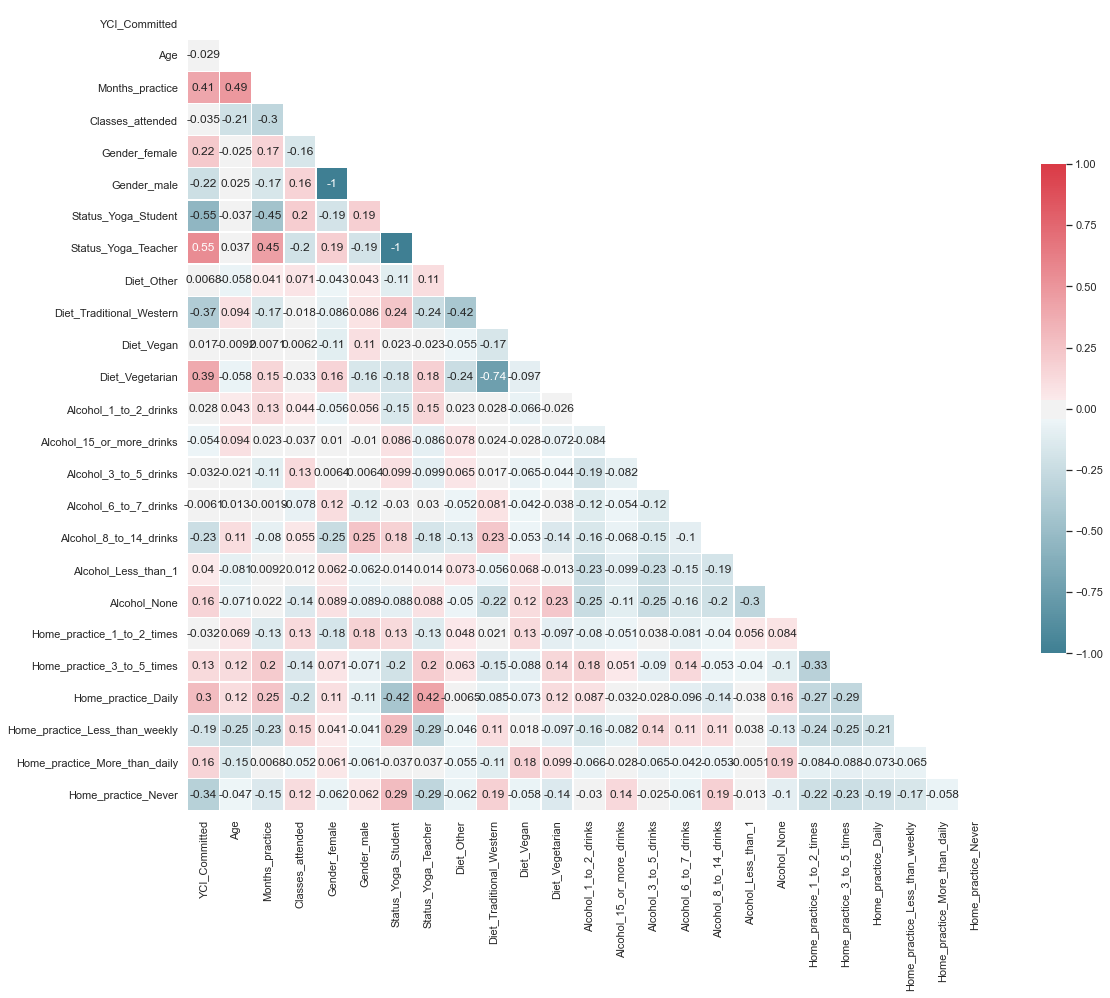

In [210]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(yoga_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(yoga_corr.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

## <font color=green> c) Now run a linear regression using the following predictors
* Months_practice
* Gender_female
* Status_Yoga_Teacher
* Diet_Traditional_Western
* Diet_Vegetarian
* Alcohol_8_to_14_drinks
* Alcohol_None
* Home_practice_Daily
* Home_practice_Less_than_weekly
* Home_practice_Never 

In [215]:
#Set variable y and X
y = yoga_with_dummies['YCI_Committed']

X1 = yoga_with_dummies[['Months_practice']]
X2 = yoga_with_dummies[['Months_practice','Gender_female']]
X3 = yoga_with_dummies[['Months_practice','Gender_female','Status_Yoga_Teacher']]
X4 = yoga_with_dummies[['Months_practice','Gender_female','Status_Yoga_Teacher','Diet_Traditional_Western']]
X5 = yoga_with_dummies[['Months_practice','Gender_female','Status_Yoga_Teacher','Diet_Traditional_Western','Diet_Vegetarian']]
X6 = yoga_with_dummies[['Months_practice','Gender_female','Status_Yoga_Teacher','Diet_Traditional_Western','Diet_Vegetarian','Alcohol_8_to_14_drinks']]
X7 = yoga_with_dummies[['Months_practice','Gender_female','Status_Yoga_Teacher','Diet_Traditional_Western','Diet_Vegetarian','Alcohol_8_to_14_drinks','Alcohol_None']]
X8 = yoga_with_dummies[['Months_practice','Gender_female','Status_Yoga_Teacher','Diet_Traditional_Western','Diet_Vegetarian','Alcohol_8_to_14_drinks','Alcohol_None','Home_practice_Daily']]
X9 = yoga_with_dummies[['Months_practice','Gender_female','Status_Yoga_Teacher','Diet_Traditional_Western','Diet_Vegetarian','Alcohol_8_to_14_drinks','Alcohol_None','Home_practice_Daily','Home_practice_Less_than_weekly']]
X10 = yoga_with_dummies[['Months_practice','Gender_female','Status_Yoga_Teacher','Diet_Traditional_Western','Diet_Vegetarian','Alcohol_8_to_14_drinks','Alcohol_None','Home_practice_Daily','Home_practice_Less_than_weekly','Home_practice_Never']]

In [216]:
X=X2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a model for Linear Regression
linreg = linear_model.LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
y_train_pred=linreg.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

# Calculate the score (R^2 for Regression) for Testing Data
y_test_pred=linreg.predict(X_test)
print(metrics.r2_score(y_train,y_train_pred))

0.23305046583900935
0.23305046583900935


In [217]:
X=X3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a model for Linear Regression
linreg = linear_model.LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
y_train_pred=linreg.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

# Calculate the score (R^2 for Regression) for Testing Data
y_test_pred=linreg.predict(X_test)
print(metrics.r2_score(y_train,y_train_pred))

0.3932759111623133
0.3932759111623133


In [218]:
X=X4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Create a model for Linear Regression
linreg = linear_model.LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
y_train_pred=linreg.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

# Calculate the score (R^2 for Regression) for Testing Data
y_test_pred=linreg.predict(X_test)
print(metrics.r2_score(y_train,y_train_pred))

0.45318148053005025
0.45318148053005025


In [219]:
X=X5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Create a model for Linear Regression
linreg = linear_model.LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
y_train_pred=linreg.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

# Calculate the score (R^2 for Regression) for Testing Data
y_test_pred=linreg.predict(X_test)
print(metrics.r2_score(y_train,y_train_pred))

0.4745918530805082
0.4745918530805082


In [220]:
X=X6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Create a model for Linear Regression
linreg = linear_model.LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
y_train_pred=linreg.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

# Calculate the score (R^2 for Regression) for Testing Data
y_test_pred=linreg.predict(X_test)
print(metrics.r2_score(y_train,y_train_pred))

0.4795664026424965
0.4795664026424965


In [221]:
X=X7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Create a model for Linear Regression
linreg = linear_model.LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
y_train_pred=linreg.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

# Calculate the score (R^2 for Regression) for Testing Data
y_test_pred=linreg.predict(X_test)
print(metrics.r2_score(y_train,y_train_pred))

0.47956998233305725
0.47956998233305725


In [222]:
X=X8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Create a model for Linear Regression
linreg = linear_model.LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
y_train_pred=linreg.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

# Calculate the score (R^2 for Regression) for Testing Data
y_test_pred=linreg.predict(X_test)
print(metrics.r2_score(y_train,y_train_pred))

0.47991714161312937
0.47991714161312937


In [223]:
X=X9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Create a model for Linear Regression
linreg = linear_model.LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
y_train_pred=linreg.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

# Calculate the score (R^2 for Regression) for Testing Data
y_test_pred=linreg.predict(X_test)
print(metrics.r2_score(y_train,y_train_pred))

0.48018324608715734
0.48018324608715734


In [224]:
X=X10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Create a model for Linear Regression
linreg = linear_model.LinearRegression()

# Fit the model with the Training data
linreg.fit(X_train,y_train)

# Calculate the score (R^2 for Regression) for Training Data
y_train_pred=linreg.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))

# Calculate the score (R^2 for Regression) for Testing Data
y_test_pred=linreg.predict(X_test)
print(metrics.r2_score(y_train,y_train_pred))

0.49241403357413926
0.49241403357413926


In [225]:
model = ols('YCI_Committed ~ Months_practice + Gender_female + Status_Yoga_Teacher + Diet_Traditional_Western + Diet_Vegetarian + Alcohol_8_to_14_drinks + Alcohol_None + Home_practice_Daily + Home_practice_Less_than_weekly + Home_practice_Never', data=yoga_with_dummies)
fitted_model = model.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          YCI_Committed   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     18.20
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           5.30e-24
Time:                        23:59:33   Log-Likelihood:                -255.43
No. Observations:                 229   AIC:                             532.9
Df Residuals:                     218   BIC:                             570.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.4898      0.191     -2.562      0.011      -0.867      -0.113
Months_practice                    0.1614      0.057      2.828      0.005       0.049       0.274
Gender_female                      0.1788      0.153      1.168      0.244      -0.123       0.480
Status_Yoga_Teacher                0.6586      0.129      5.114      0.000       0.405       0.912
Diet_Traditional_Western          -0.0756      0.156     -0.485      0.628      -0.382       0.231
Diet_Vegetarian                    0.4940      0.166      2.976      0.003       0.167       0.821
Alcohol_8_to_14_drinks            -0.1814      0.172     -1.052      0.294      -0.521       0.158
Alcohol_None                       0.0545      0.124      0.441      0.659      -0.189       0.298
Home_practice_Daily                0.0663      0.144      0.461      0.645      -0.217       0.349
Home_practice_Less_than_weekly    -0.1280      0.156     -0.823      0.412      -0.435       0.179
Home_practice_Never               -0.5049      0.166     -3.033      0.003      -0.833      -0.177
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.206
Skew:                           0.072   Prob(JB):                        0.902
Kurtosis:                       3.029   Cond. No.                         8.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The model above is quite good with R-squared = .45 , but can it be refined more by removing those values that are not signficant?

#### Remove the following:
* Gender_female
* Diet_Traditional_Western
* Alcohol_8_to_14_drinks
* Alcohol_None
* Home_practice_Daily
* Home_practice_Less_than_weekly


In [227]:
model = ols('YCI_Committed ~ Months_practice  + Status_Yoga_Teacher + Diet_Vegetarian + Home_practice_Never', data=yoga_with_dummies)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          YCI_Committed   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     44.32
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           2.21e-27
Time:                        00:02:24   Log-Likelihood:                -258.18
No. Observations:                 229   AIC:                             526.4
Df Residuals:                     224   BIC:                             543.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.4670      0.086     -5.444      0.000      -0.636      -0.298
Months_practice         0.1740      0.056      3.110      0.002       0.064       0.284
Status_Yoga_Teacher     0.7449      0.116      6.413      0.000       0.516       0.974
Diet_Vegetarian         0.6011      0.112      5.367      0.000       0.380       0.822
Home_practice_Never    -0.5045      0.155     -3.247      0.001      -0.811      -0.198
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.732
Skew:                           0.127   Prob(JB):                        0.693
Kurtosis:                       3.111   Cond. No.                         4.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  Section 6 summary point
#### Results suggest the best model contains:
- longer time practicing Yoga
- being a Yoga teacher
- having a vegetarian diet positively predict YCI_Committment
- Never practicing yoga at home negatively predicts.

### <font color=green> Section 7) Commitment as predictor of wellness

In [151]:
yoga.columns

Index(['Gender', 'Age', 'Status', 'Months_practice', 'Diet', 'Alcohol',
       'Classes_attended', 'Home_practice', 'YCI_1', 'YCI_2', 'YCI_3', 'YCI_4',
       'YCI_5', 'YCI_6', 'YCI_7', 'YCI_8', 'YCI_9', 'YCI_10', 'YCI_11',
       'YCI_12', 'DASS_Stress', 'DASS_Anxiety', 'DASS_Depress',
       'YCI_Committed', 'Spirituality', 'Mindfulness', 'Purpose'],
      dtype='object')

In [213]:
yoga_wellness_corr = yoga[['YCI_Committed','YCI_Casual','DASS_Stress','DASS_Anxiety','DASS_Depress',
        'Spirituality', 'Mindfulness', 'Purpose','Age','Months_practice','Classes_attended', 'Home_practice']]
yoga_wellness_corr.corr(method='pearson')

,YCI_Committed,YCI_Casual,DASS_Stress,DASS_Anxiety,DASS_Depress,Spirituality,Mindfulness,Purpose,Age,Months_practice,Classes_attended
YCI_Committed,1.000000,-0.495843,-0.209454,-0.139129,-0.224362,-0.536674,0.248255,0.341900,-0.029441,0.406820,-0.034501
YCI_Casual,-0.495843,1.000000,0.065409,0.008491,0.128462,0.366346,-0.147011,-0.190147,0.082724,-0.141359,0.035793
DASS_Stress,-0.209454,0.065409,1.000000,0.624436,0.559727,0.240465,-0.434195,-0.230478,-0.258471,-0.200218,0.127913
DASS_Anxiety,-0.139129,0.008491,0.624436,1.000000,0.506703,0.021905,-0.326408,-0.191998,-0.324233,-0.219431,0.088926
DASS_Depress,-0.224362,0.128462,0.559727,0.506703,1.000000,0.326585,-0.370822,-0.367959,-0.203011,-0.196160,0.013589
Spirituality,-0.536674,0.366346,0.240465,0.021905,0.326585,1.000000,-0.370275,-0.429162,-0.093177,-0.236839,0.115250
Mindfulness,0.248255,-0.147011,-0.434195,-0.326408,-0.370822,-0.370275,1.000000,0.437623,0.224989,0.281266,-0.145626
Purpose,0.341900,-0.190147,-0.230478,-0.191998,-0.367959,-0.429162,0.437623,1.000000,0.168058,0.295682,-0.122974
Age,-0.029441,0.082724,-0.258471,-0.324233,-0.203011,-0.093177,0.224989,0.168058,1.000000,0.485739,-0.208313
Months_practice,0.406820,-0.141359,-0.200218,-0.219431,-0.196160,-0.236839,0.281266,0.295682,0.485739,1.000000,-0.296656


In [214]:
model = ols('Spirituality ~ YCI_Committed + YCI_Casual + Months_practice', data=yoga)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Spirituality   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     32.48
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.76e-17
Time:                        23:55:01   Log-Likelihood:                -283.74
No. Observations:                 229   AIC:                             575.5
Df Residuals:                     225   BIC:                             589.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.743e-16      0.056   3.13e-15      1.000      -0.110       0.110
YCI_Committed      -0.4565      0.070     -6.550      0.000      -0.594      -0.319
YCI_Casual          0.1355      0.064      2.107      0.036       0.009       0.262
Months_practice    -0.0320      0.061     -0.523      0.601      -0.152       0.089
==============================================================================
Omnibus:                       18.841   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.016
Skew:                          -0.721   Prob(JB):                     2.73e-05
Kurtosis:                       3.352   Cond. No.                         2.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model = ols('DASS_Stress ~ YCI_Committed + YCI_Casual + Months_practice', data=yoga)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DASS_Stress   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     4.866
Date:                Fri, 07 Aug 2020   Prob (F-statistic):            0.00267
Time:                        22:37:54   Log-Likelihood:                -317.74
No. Observations:                 229   AIC:                             643.5
Df Residuals:                     225   BIC:                             657.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.163e-17      0.065   6.44e-16      1.000      -0.127       0.127
YCI_Committed      -0.1745      0.081     -2.158      0.032      -0.334      -0.015
YCI_Casual         -0.0402      0.075     -0.539      0.591      -0.187       0.107
Months_practice    -0.1349      0.071     -1.902      0.058      -0.275       0.005
==============================================================================
Omnibus:                       35.062   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.485
Skew:                           0.952   Prob(JB):                     2.96e-11
Kurtosis:                       4.208   Cond. No.                         2.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model = ols('DASS_Anxiety ~ YCI_Committed + YCI_Casual + Months_practice', data=yoga)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DASS_Anxiety   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     4.306
Date:                Fri, 07 Aug 2020   Prob (F-statistic):            0.00562
Time:                        22:38:18   Log-Likelihood:                -318.55
No. Observations:                 229   AIC:                             645.1
Df Residuals:                     225   BIC:                             658.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.551e-17      0.065  -8.56e-16      1.000      -0.128       0.128
YCI_Committed      -0.0939      0.081     -1.157      0.248      -0.254       0.066
YCI_Casual         -0.0650      0.075     -0.868      0.386      -0.213       0.083
Months_practice    -0.1904      0.071     -2.675      0.008      -0.331      -0.050
==============================================================================
Omnibus:                      108.803   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.235
Skew:                           2.062   Prob(JB):                     3.30e-82
Kurtosis:                       7.725   Cond. No.                         2.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model = ols('DASS_Depress ~ YCI_Committed + YCI_Casual + Months_practice', data=yoga)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DASS_Depress   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     5.157
Date:                Fri, 07 Aug 2020   Prob (F-statistic):            0.00182
Time:                        22:38:33   Log-Likelihood:                -317.32
No. Observations:                 229   AIC:                             642.6
Df Residuals:                     225   BIC:                             656.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept                0      0.064          0      1.000      -0.127       0.127
YCI_Committed      -0.1559      0.081     -1.931      0.055      -0.315       0.003
YCI_Casual          0.0331      0.074      0.444      0.657      -0.114       0.180
Months_practice    -0.1281      0.071     -1.809      0.072      -0.268       0.011
==============================================================================
Omnibus:                      134.695   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              805.688
Skew:                           2.345   Prob(JB):                    1.11e-175
Kurtosis:                      10.902   Cond. No.                         2.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model = ols('Mindfulness ~ YCI_Committed + YCI_Casual + Months_practice', data=yoga)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Mindfulness   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     8.556
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           2.10e-05
Time:                        22:39:16   Log-Likelihood:                -312.57
No. Observations:                 229   AIC:                             633.1
Df Residuals:                     225   BIC:                             646.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.816e-16      0.063  -6.04e-15      1.000      -0.124       0.124
YCI_Committed       0.1345      0.079      1.701      0.090      -0.021       0.290
YCI_Casual         -0.0493      0.073     -0.676      0.500      -0.193       0.094
Months_practice     0.2196      0.069      3.167      0.002       0.083       0.356
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                0.880
Skew:                           0.064   Prob(JB):                        0.644
Kurtosis:                       3.275   Cond. No.                         2.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model = ols('Purpose ~ YCI_Committed + YCI_Casual + Months_practice', data=yoga)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Purpose   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     12.99
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           7.41e-08
Time:                        22:40:01   Log-Likelihood:                -306.65
No. Observations:                 229   AIC:                             621.3
Df Residuals:                     225   BIC:                             635.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.939e-18      0.062   1.13e-16      1.000      -0.121       0.121
YCI_Committed       0.2432      0.077      3.157      0.002       0.091       0.395
YCI_Casual         -0.0426      0.071     -0.599      0.550      -0.183       0.097
Months_practice     0.1907      0.068      2.823      0.005       0.058       0.324
==============================================================================
Omnibus:                       21.626   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.105
Skew:                          -0.731   Prob(JB):                     3.54e-06
Kurtosis:                       3.703   Cond. No.                         2.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <font color=green> Conclusions
* <b> Yoga Commitment Scale can be used to measure casual yoga practice and committed yoga practice</b>

    
* <b> Committed yoga is best predicted by</b> 
    - longer time practicing Yoga
    - being a Yoga teacher 
    - having a vegetarian diet positively predict YCI_Committment
    - Never practicing yoga at home negatively predicts
    
    
* <b>Committment to Yoga as a discipline is associated with</b>
    - Months practicing Yoga (+ve)
    - Mindfulness (+ve)
    - Purpose in life (+ve)
    - Spirituality (+ve)
    - Stress (-ve)
    - Anxiety (-ve)
    - Depression (-ve)
    
    
* <b> A casual attitude towards Yoga is negatively associated with</b>
    - Months practicing Yoga (-ve)
    - Mindfulness (-ve)
    - Purpose in life (-ve)
    - Spirituality (-ve)
    - Depression (+ve)
    
    
* <b>Commitment to Yoga is predictive of</b>
    - Spirituality (+ve)
    - Purpose in life (+ve)